Logistic Regression on Building_01 Data from T_315500_234500_NW.bin


In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
#Reading CSV File, Building_01, which is actually building_0000 
colsRemove= ['R','B','G']
df = pd.read_csv('117_roofDoors_Equal.txt', sep= "\t", header=0, names = ['X','Y','Z','R','B','G','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type']).drop(colsRemove, axis = 'columns')
#df1 = df.dropna() 
#df2 = df1.values

#print(df)
#print(df2[:, 15])
from sklearn.utils import resample 
df_majority = df[df.Type == 'door']
df_minority = df[df.Type == 'roof'] 

#print(df_majority)
#upsampling majority class 

df_minority_upsampled = resample(df_minority, replace = True, n_samples = 13849, random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#display class counts 
df_upsampled.Type.value_counts()
#df.Type.value_counts()
#print(df.shape)
#print(df)

roof    13849
door    13849
Name: Type, dtype: int64

In [ ]:
'''
#Reading CSV File #1 
colsRemove= ['R','B','G']
df_a = pd.read_csv('building_117_roof_01_door01_modified.csv',sep = ',',header=0, names = ['X','Y','Z','R','B','G','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type']).drop(colsRemove, axis = 'columns')
df_a1 = df_a.dropna() 
df_a2 = df_a1.values
print(df_a2.shape)
print(df_a)
'''


"\n#Reading CSV File #1 \ncolsRemove= ['R','B','G']\ndf_a = pd.read_csv('building_117_roof_01_door01_modified.csv',sep = ',',header=0, names = ['X','Y','Z','R','B','G','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type']).drop(colsRemove, axis = 'columns')\ndf_a1 = df_a.dropna() \ndf_a2 = df_a1.values\nprint(df_a2.shape)\nprint(df_a)\n"

In [ ]:
'''
#Checking to see if everything is working 
#df.info()
#df.head(3)
#classifier_count = df['Classification'].value_counts().to_frame()
#classifier_count.head(2)

df_a.info()
#df_a.head(3)
#print(df['Z'])
'''

"\n#Checking to see if everything is working \n#df.info()\n#df.head(3)\n#classifier_count = df['Classification'].value_counts().to_frame()\n#classifier_count.head(2)\n\ndf_a.info()\n#df_a.head(3)\n#print(df['Z'])\n"

In [ ]:
#without upsampling
#I will use all the attributes (building_000000 CSV)
#x = df2[:, :14] 
#y = df2[:, 14]

#with upsampling 
x = df_upsampled.drop('Type', axis = 1)
print(x)
y = df_upsampled.Type
print(y)
print(x.shape,y.shape)

                 X            Y          Z  Point_Source_ID  Scan_Angle_Rank  \
17800  315722.7850  234775.4302   8.279000               13               -5   
17801  315721.8030  234778.2720   5.721000               14               12   
17802  315721.7820  234778.2739   6.445000               14               12   
17803  315721.9170  234778.3799   5.669000               14               12   
17804  315721.5330  234778.0928   8.401000               14               12   
...            ...          ...        ...              ...              ...   
4817   315994.1400  234685.1221  17.209000               12                2   
168    315995.2490  234680.9282  16.434000               11              -18   
10394  315991.9100  234681.7749  17.403999               24               -8   
10815  315990.6021  234686.9019  17.417000               24               -7   
13177  315995.3900  234687.0991  16.792999               24               -8   

       Flightline_Edge  Scan_Direction 

In [ ]:

#Reading CSV File #2 
colsRemove= ['R','B','G']
df_a = pd.read_csv('building_02_roof_doors.csv',sep = ',',header = 0,names = ['X','Y','Z','R','B','G','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type']).drop(colsRemove, axis='columns')
#df_a1 = df_a.dropna() 
#df_a2 = df_a1.values
#print(df_a2.shape)
df_a.Type.value_counts()


roof    57636
door      739
Name: Type, dtype: int64

In [ ]:
#going to try some downsampling on the roofs
from sklearn.utils import resample 
df_majority2 = df_a[df_a.Type == 'door']
df_minority2 = df_a[df_a.Type == 'roof'] 
#
#print(df_majority)
#upsampling majority class 

df_minority_downsampled2 = resample(df_minority2, replace = True, n_samples = 739, random_state=123)
df_downsampled2 = pd.concat([df_majority2, df_minority_downsampled2])

#display class counts 
df_downsampled2.Type.value_counts()
#df.Type.value_counts()
#print(df.shape)
#print(df)

x1 = df_downsampled2.drop('Type', axis = 1)
#print(x1)
y1 = df_downsampled2.Type
#print(y1)
print(x1.shape,y1.shape)

(1478, 12) (1478,)


In [ ]:
#For building 02
#x1 = df_a2[:, :12]
#y1 = df_a2[:, 12] 
#print(x1)
#print(y1)

In [ ]:
#Train/Test Split
#print(x)
x_scaled = preprocessing.scale(x)
#print(x_scaled)
#with scaling 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)

#without scaling 
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.99, train_size = 0.01)

#Making sure that 
y_train=y_train.astype('str')
y_test = y_test.astype('str')
print(x_train.shape, x_test.shape)
print(y_train)
print(x_train)

(20773, 12) (6925, 12)
25744    door
28120    door
3447     roof
14198    roof
28008    door
         ... 
18510    door
428      roof
20382    door
31431    door
1758     roof
Name: Type, Length: 20773, dtype: object
[[-0.47  2.92 -0.88 ... -0.87 -0.68  1.59]
 [-0.62  0.77 -1.23 ... -0.57 -0.83 -0.63]
 [ 0.96 -0.89  0.97 ... -0.78 -0.48 -0.63]
 ...
 [-1.31  0.5  -1.03 ...  0.25 -0.17  1.59]
 [-0.46  0.74 -0.89 ...  0.24  0.81  1.59]
 [ 0.96 -0.8   1.06 ... -0.88  0.65  1.59]]


In [ ]:
#Logistic Regression 
logreg = LogisticRegression(C=0.0001).fit(x_train,y_train)
yhat_train = logreg.predict(x_train)
print(np.unique(yhat_train))
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy for Train Data:",accuracy_train)

yhat_test = logreg.predict(x_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy for Test Data:",accuracy_test)

['door' 'roof']
Accuracy for Train Data: 0.995667452943725
Accuracy for Test Data: 0.995956678700361


Confusion matrix, without normalization
[[3411   31]
 [   3 3480]]
Normalized confusion matrix
[[9.91e-01 9.01e-03]
 [8.61e-04 9.99e-01]]


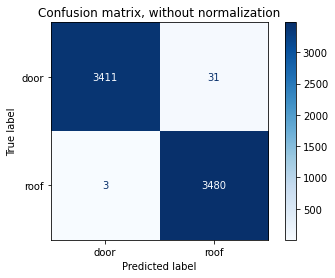

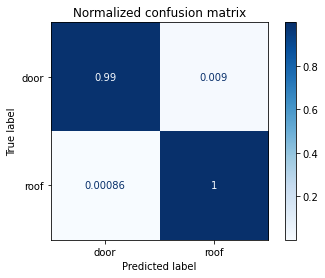

In [ ]:
#confusion matrices
np.set_printoptions(precision=2)
class_names = ['door','roof']
classifier = linear_model.LogisticRegression(C=10**-5).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#reading door/roof csv mixed 
#print(x1)
yhat_building02 = logreg.predict(x1)
print(yhat_building02)
print(np.unique(yhat_building02))
accuracy_b02 = accuracy_score(y1, yhat_building02)
print("Accuracy for Data:",accuracy_b02)

['roof' 'roof' 'roof' ... 'roof' 'roof' 'roof']
['roof']
Accuracy for Data: 0.5


In [ ]:

#Reading Door CSV File 
colsRemove= ['R','B','G']
df_b = pd.read_csv('building_02_doors_combined_234500_NW.csv',sep = ',',header = 0,names = ['X','Y','Z','R','B','G','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type']).drop(colsRemove, axis='columns')
df_b1 = df_b.dropna() 
df_b2 = df_b1.values
print(df_b2.shape)
x2 = df_b2[:, :12]
y2 = df_b2[:, 12] 
print(x2)
yhat_building03 = logreg.predict(x2)
#print(yhat_building03)
print(np.unique(yhat_building03))
accuracy_b03 = accuracy_score(y2, yhat_building03)
print("Accuracy for Data:",accuracy_b03)


(739, 13)
[[315718.655 234793.021 7.99700022 ... 392193.1866 135 4]
 [315718.719 234793.0811 7.78999996 ... 392193.1866 140 4]
 [315718.812 234793.1812 7.75899982 ... 392193.1867 51 4]
 ...
 [315730.537 234790.8491 6.1420002 ... 394844.7917 181 4]
 [315729.588 234792.083 7.08599997 ... 395108.2966 11 4]
 [315729.582 234792.1299 7.62400007 ... 395108.2966 17 4]]
['roof']
Accuracy for Data: 0.0


In [ ]:
'''
#Logistic Regression 
logreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization
logreg.fit(x_train, y_train)
yhat_train = logreg.predict(x_train)
#print(yhat_train)

#finding accuracy of applying model on training data
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy on train set:",accuracy_train)

#finding accuracy of applying model on test data 
yhat_test = logreg.predict(x_test)
#print(yhat_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy on test set:",accuracy_test)
'''

'\n#Logistic Regression \nlogreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization\nlogreg.fit(x_train, y_train)\nyhat_train = logreg.predict(x_train)\n#print(yhat_train)\n\n#finding accuracy of applying model on training data\naccuracy_train = accuracy_score(y_train, yhat_train)\nprint("Accuracy on train set:",accuracy_train)\n\n#finding accuracy of applying model on test data \nyhat_test = logreg.predict(x_test)\n#print(yhat_test)\naccuracy_test = accuracy_score(y_test, yhat_test)\nprint("Accuracy on test set:",accuracy_test)\n'

In [ ]:
'''
#finding accuracy of applying model to a different building 
yhat_building_000001 = logreg.predict(x1)
print(yhat_building_000001)
accuracy_building_000001 = accuracy_score(y1, yhat_building_000001)
print("Accuracy on a different building (01):",accuracy_building_000001)
'''

'\n#finding accuracy of applying model to a different building \nyhat_building_000001 = logreg.predict(x1)\nprint(yhat_building_000001)\naccuracy_building_000001 = accuracy_score(y1, yhat_building_000001)\nprint("Accuracy on a different building (01):",accuracy_building_000001)\n'

In [ ]:
#Model Parameters (w/o Regularization)
w = logreg.coef_ 
intercept = logreg.intercept_

precision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary',pos_label='roof')
print("Coefficient:",w)
print("Intercept:",intercept)
print("Precision:",precision)
print("Recall:",recall)
print("Fscore:",fscore)


Coefficient: [[ 4.34e-01 -3.79e-01  4.15e-01  1.87e-02 -4.88e-02 -1.93e-09  0.00e+00
  -9.68e-02 -1.01e-01  1.25e-01  1.25e-02 -1.13e-01]]
Intercept: [-0.01]
Precision: 0.991990082959855
Recall: 0.9998077847188852
Fscore: 0.9958835918054758


Confusion matrix, without normalization
[[  0 739]
 [  0 739]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


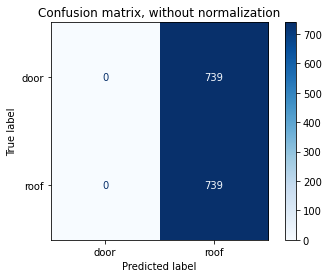

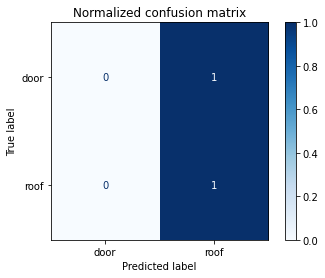

In [ ]:
#confusion matrices
np.set_printoptions(precision=2)
class_names = ['door','roof']
classifier = linear_model.LogisticRegression(C=10**-5).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22ec9222-3a33-4967-8b6b-eec8dcc0f029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>